In [163]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz \
  && sudo tar -xzf ta-lib-0.4.0-src.tar.gz \
  && sudo rm ta-lib-0.4.0-src.tar.gz \
  && cd ta-lib/ \
  && sudo ./configure --prefix=/usr \
  && sudo make \
  && sudo make install \
  && cd ~ \
  && sudo rm -rf ta-lib/ \
  && pip install ta-lib

--2022-12-03 06:56:42--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-12-03 06:56:42--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-12-03 06:56:42--  http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netactuat

In [164]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [165]:
import talib as ta
import yfinance as yf
from talib import abstract

import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import numpy as np
import pandas as pd

In [166]:
# ta.get_function_groups() # get all indicators along with the group they belong to
# ta.get_function_groups()['Momentum Indicators'] # get indicators of a group
# ta.get_functions() # all function
# ?ta.MACD # function definition
# dir(ta) # list of the attributes and methods of any object
list(ta.get_function_groups().keys()) # these are the indicator groups

['Cycle Indicators',
 'Math Operators',
 'Math Transform',
 'Momentum Indicators',
 'Overlap Studies',
 'Pattern Recognition',
 'Price Transform',
 'Statistic Functions',
 'Volatility Indicators',
 'Volume Indicators']

In [167]:
# df = yf.download('RELIANCE.NS',start='2022-12-1',end='2022-12-2',interval = "15m",ignore_tz = False,auto_adjust = True)

In [168]:
df = yf.download('RELIANCE.NS',start='2022-11-1',end='2022-12-2',interval = "30m")
df.tail(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-01 13:00:00,2747.300049,2747.850098,2735.750000,2740.449951,2740.449951,224504
2022-12-01 13:30:00,2740.199951,2744.149902,2734.199951,2736.949951,2736.949951,261018
2022-12-01 14:00:00,2737.000000,2743.550049,2736.000000,2740.350098,2740.350098,215763
2022-12-01 14:30:00,2740.350098,2740.449951,2728.449951,2729.649902,2729.649902,327756
2022-12-01 15:00:00,2729.350098,2729.649902,2716.199951,2725.550049,2725.550049,848569


In [169]:
# Custom function - Pivot Points,  Supports and Resistances
def PPSR(df1):  
    df = df1.copy(deep=True)
    PP = pd.Series((df['High'] + df['Low'] + df['Close']) / 3)  
    R1 = pd.Series(2 * PP - df['Low'])  
    S1 = pd.Series(2 * PP - df['High'])  
    R2 = pd.Series(PP + df['High'] - df['Low'])  
    S2 = pd.Series(PP - df['High'] + df['Low'])  
    R3 = pd.Series(df['High'] + 2 * (PP - df['Low']))  
    S3 = pd.Series(df['Low'] - 2 * (df['High'] - PP))  
    psr = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3}  
    PSR = pd.DataFrame(psr)  
    df = df.join(PSR)  
    return df['PP'],df['R3'],df['S3'] # taking Pivot Point & 3rd Supports and Resistances

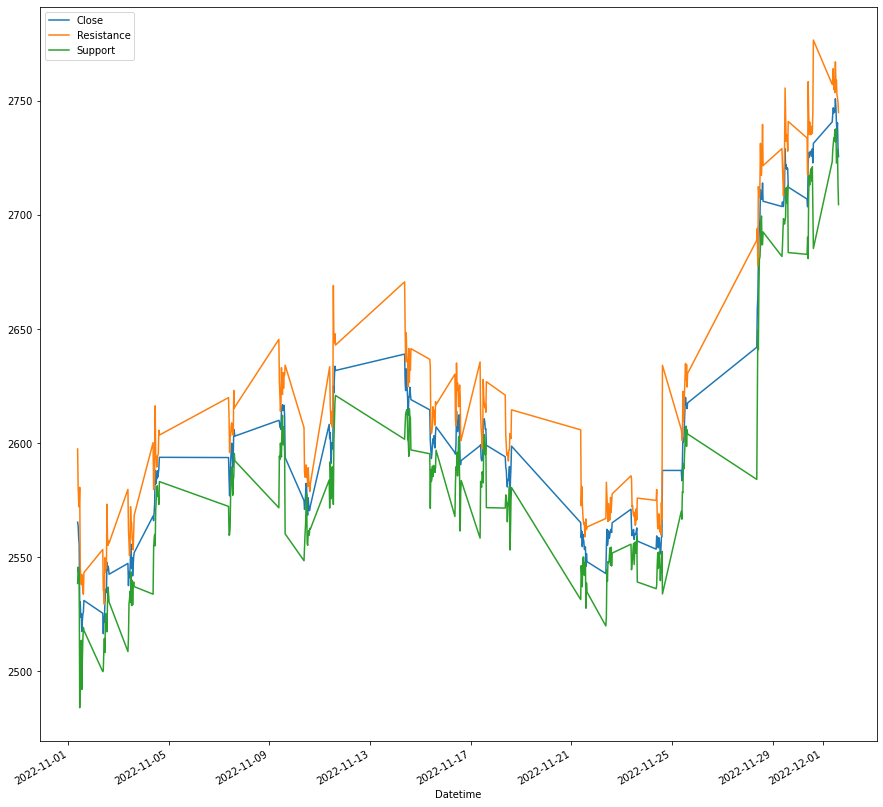

In [170]:
# Indicator - Pivot Points, Supports and Resistances  + EMA -> We're only plotting 3rd Supports and Resistances 

df['EMA'] = ta.EMA(df['Close'], timeperiod = 15)
df['Pivot Point'],df['Resistance'],df['Support'] = PPSR(df)
df[['Close','Resistance','Support']].plot(figsize=(15,15)) 
plt.show()

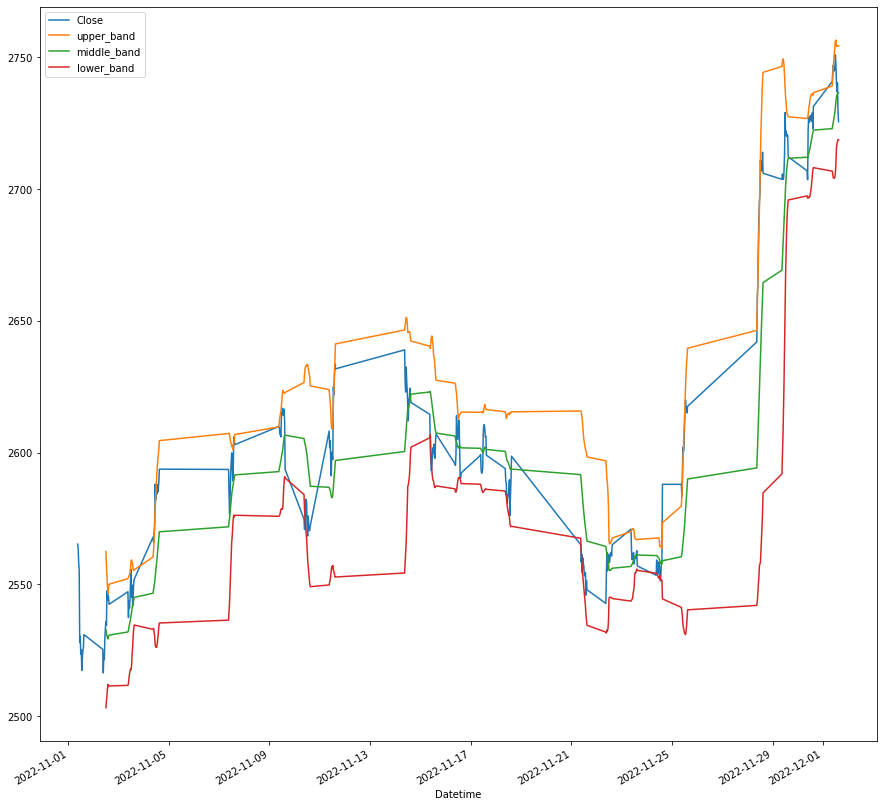

In [171]:
# Indicator - Bollinger Bands :  standard deviation level above and below a SMA of the price

df['upper_band'], df['middle_band'], df['lower_band'] = ta.BBANDS(df['Close'], timeperiod =20)
df[['Close','upper_band','middle_band','lower_band']].plot(figsize=(15,15))
plt.show()

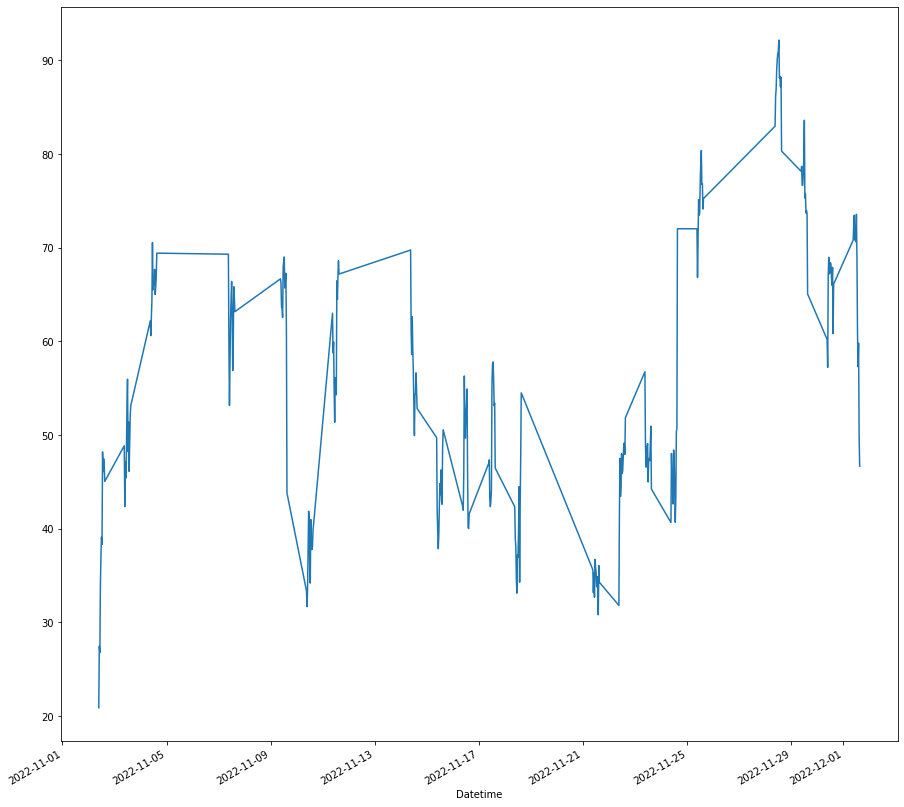

In [172]:
# Indicator - RSI : speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued

df['RSI'] = ta.RSI(df['Close'],14) 
df['RSI'].plot(figsize=(15,15)) 
plt.show()

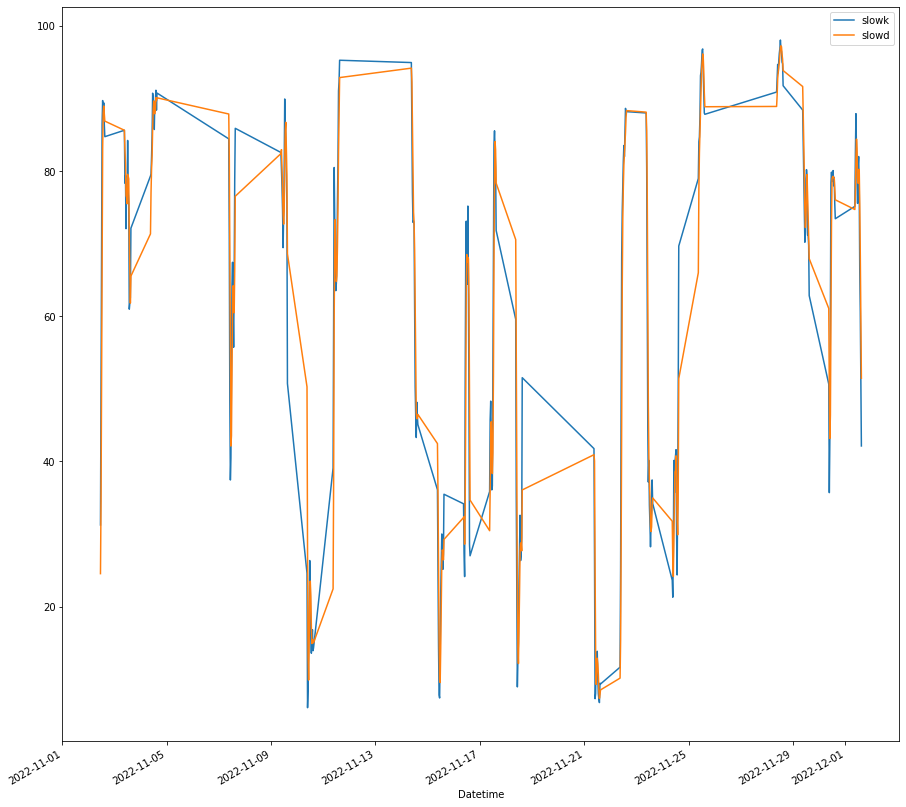

In [173]:
# Stochastic oscillators - Slow

df['slowk'],df['slowd'] = ta.STOCH(df['High'],df['Low'],df['Close'], fastk_period=14, 
                                   slowk_period=3, slowk_matype=0, 
                                   slowd_period=3, slowd_matype=0) 
df[['slowk','slowd']].plot(figsize=(15,15)) 
plt.show()

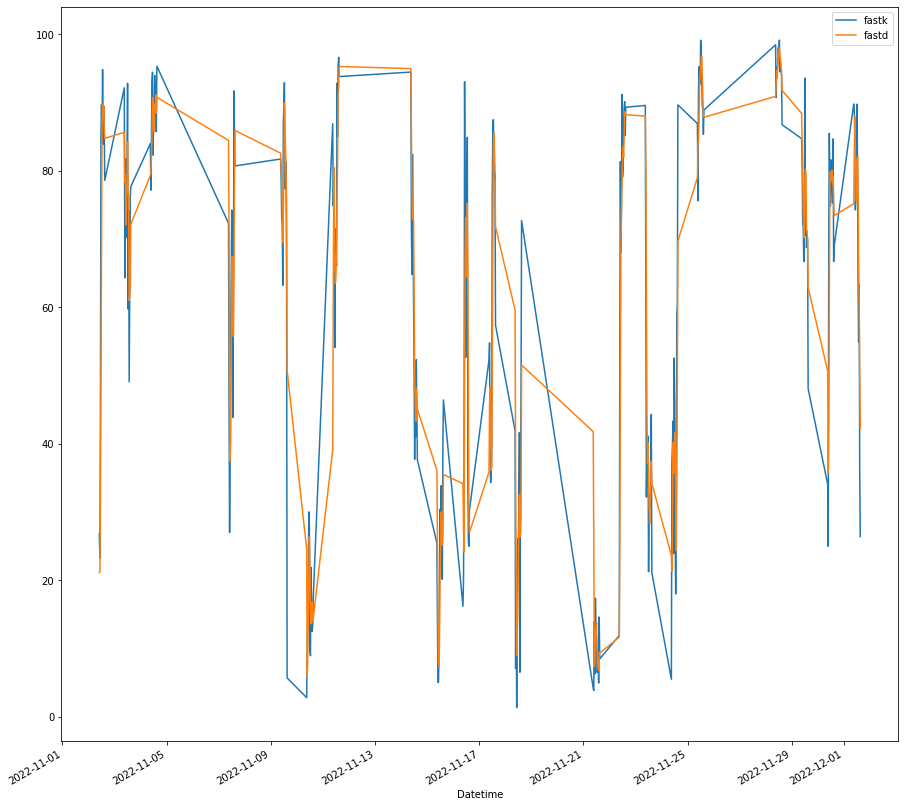

In [174]:
# Stochastic oscillators - Fast

df['fastk'],df['fastd'] = ta.STOCHF(df['High'],df['Low'],df['Close'], fastk_period=14, 
                                                fastd_period=3, fastd_matype=0) 
df[['fastk','fastd']].plot(figsize=(15,15)) 
plt.show()

In [175]:
candle_names = ta.get_function_groups()['Pattern Recognition']
candle_names[:5]

['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE']

In [176]:
# For NSE data - we need to use .NS extension

df = yf.download('RELIANCE.NS',start='2022-1-1',end='2022-12-2',interval = "1d") # 1 day interval
df.tail(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-24,2566.000000,2594.000000,2548.199951,2579.100098,2579.100098,4333225
2022-11-25,2589.000000,2624.899902,2582.100098,2617.600098,2617.600098,3391988
2022-11-28,2608.899902,2721.050049,2502.000000,2707.550049,2707.550049,14549929
2022-11-29,2703.949951,2731.649902,2694.000000,2712.199951,2712.199951,5103687
2022-11-30,2712.500000,2745.449951,2698.199951,2731.350098,2731.350098,12075137


In [177]:
fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])

fig.update_layout(
    title='Candlestick Chart',
    yaxis_title='RELIANCE.NS Stock',
    shapes = [dict(x0='2022-11-28', x1='2022-12-02', y0=0, y1=1, xref='x', yref='paper',line_width=2),
              dict(x0='2022-04-18', x1='2022-04-30', y0=0, y1=1, xref='x', yref='paper',line_width=2),
              dict(x0='2022-06-10', x1='2022-07-02', y0=0, y1=1, xref='x', yref='paper',line_width=2)],
    annotations=[dict(x='2022-11-28', y=0.05, xref='x', yref='paper',showarrow=False, xanchor='left', text='Breakout'),
                 dict(x='2022-04-18', y=0.05, xref='x', yref='paper',showarrow=False, xanchor='left', text='Breakout'),
                 dict(x='2022-06-10', y=0.05, xref='x', yref='paper',showarrow=False, xanchor='left', text='BreakDown')]
)

fig.show()



In [178]:
df = yf.download('RELIANCE.NS',start='2022-1-1',end='2022-12-2',interval = "1h") # 1 hour interval
df['EMA'] = ta.EMA(df['Close'], timeperiod = 15)
df.tail(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,EMA
2022-12-01 11:15:00,2743.050049,2749.500000,2741.000000,2749.300049,2749.300049,329602,2725.686402
2022-12-01 12:15:00,2749.000000,2752.699951,2745.000000,2746.699951,2746.699951,340669,2728.313096
2022-12-01 13:15:00,2746.750000,2747.750000,2734.199951,2740.399902,2740.399902,529867,2729.823947
2022-12-01 14:15:00,2741.000000,2743.550049,2716.199951,2722.100098,2722.100098,882088,2728.858466
2022-12-01 15:15:00,2722.149902,2726.850098,2720.399902,2725.550049,2725.550049,398576,2728.444914


In [179]:
fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])

fig.update_layout(
    title='Candlestick Chart',
    yaxis_title='RELIANCE.NS Stock',
    shapes = [dict(x0='2022-11-28', x1='2022-12-02', y0=0, y1=1, xref='x', yref='paper',line_width=2),
              dict(x0='2022-04-18', x1='2022-04-30', y0=0, y1=1, xref='x', yref='paper',line_width=2),
              dict(x0='2022-06-10', x1='2022-07-02', y0=0, y1=1, xref='x', yref='paper',line_width=2)],
    annotations=[dict(x='2022-11-28', y=0.05, xref='x', yref='paper',showarrow=False, xanchor='left', text='Breakout'),
                 dict(x='2022-04-18', y=0.05, xref='x', yref='paper',showarrow=False, xanchor='left', text='Breakout'),
                 dict(x='2022-06-10', y=0.05, xref='x', yref='paper',showarrow=False, xanchor='left', text='BreakDown')]
)

fig.add_trace(go.Scatter(x=df.index,y=df['EMA'],name="EMA-15",line=dict(color='#17becf')))

fig.show()


In [180]:
morning_star = ta.CDLMORNINGSTAR(df['Open'], df['High'], df['Low'], df['Close'])

engulfing = ta.CDLENGULFING(df['Open'], df['High'], df['Low'], df['Close'])

df['Morning Star'] = morning_star
df['Engulfing'] = engulfing

bullish_engulfing_days = df[df['Engulfing'] == 100]
bearish_engulfing_days = df[df['Engulfing'] == -100]

In [181]:
fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])
 
fig.update_layout(title='Candlestick Chart',yaxis_title='RELIANCE.NS Stock')

fig.add_scatter(x=bullish_engulfing_days.index,y=bullish_engulfing_days['Close'],mode='markers',
                marker=dict(size=5,color='#ff7f0e'),name='Bullish')

fig.add_scatter(x=bearish_engulfing_days.index,y=bearish_engulfing_days['Close'],mode='markers',
                marker=dict(size=5,color='#9467bd'),name='Bearish')

fig.show()